# Linear Regression from Scratch in PyTorch


Linear Regression is a foundational tool in the field of machine learning and statistics, used for predicting a continuous target variable based on one or more predictor variables. This guide delves into implementing linear regression in PyTorch, a leading deep learning library.

## Theoretical Background

Linear regression models the relationship between a dependent variable, `y`, and one or more independent variables, `X`, as a linear function:

$ y = Xw + b + \epsilon $

- $X$ represents the independent variables (features).
- $w$ is a weight matrix corresponding to the coefficients of the features.
- $b$ is the bias term, an intercept in the linear equation.
- $\epsilon$ is the error term, capturing the deviation of the predictions from the actual values.

The goal of linear regression is to find the optimal $w$ and $b$ that minimize the difference between predicted and actual values, typically using the Mean Squared Error (MSE) loss function:

$ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $

Here, $y_i$ is the actual value, and $\hat{y}_i$ is the predicted value for the ith instance.

## Setup

In [1]:
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from src.data import DataLoader
from src.trainer import Trainer
from src.optimizers import SGD

## Data Preparation

### Synthetic Data Generation

We generate synthetic data to mimic a real-world linear relationship, adding Gaussian noise to simulate real-world data imperfections. This data serves as a playground to test our regression models.

In [2]:
n = 1000
w = torch.tensor([2, -3.4]).reshape((-1, 1))
b = 4

X = torch.randn(n, len(w))
noise = torch.normal(mean=0, std=0.01, size=(n, 1))
y = X @ w + b + noise

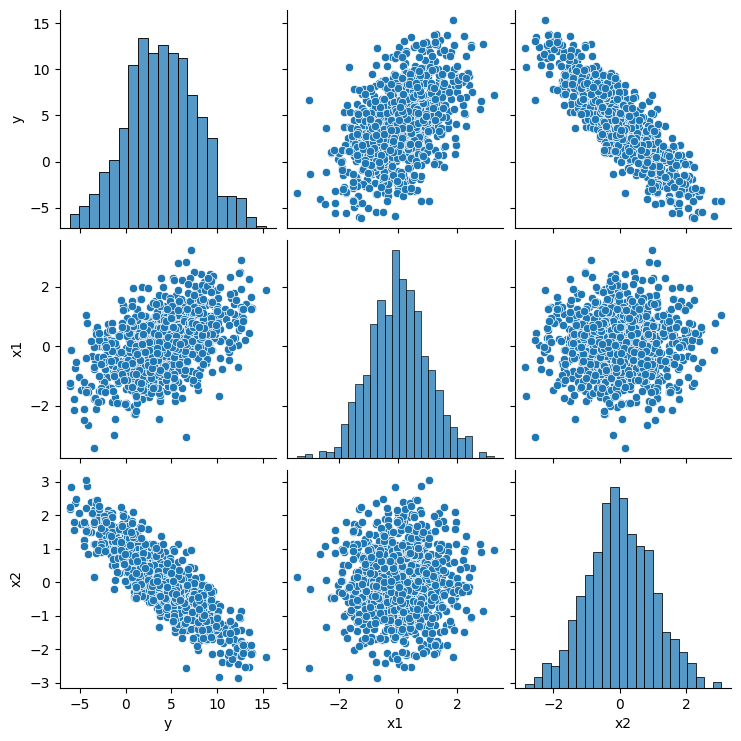

In [3]:
df = pd.DataFrame(torch.cat([y.reshape(-1, 1), X], dim=1), columns=["y", "x1", "x2"])
sns.pairplot(df)

### Data Splitting

The data is split into training and validation sets. The training set is used to train the model, and the validation set is used to evaluate its performance. This split helps in detecting overfitting and underfitting.

In [4]:
def train_test_split(X, y, train_size=0.8):
    # Shuffle the indices
    indices = torch.randperm(len(X)).tolist()

    # Calculate the number of samples in the training set
    train_size = int(train_size * len(X))

    # Slice the tensors to create training and validation sets
    X_train, y_train = X[indices[:train_size]], y[indices[:train_size]]
    X_val, y_val = X[indices[train_size:]], y[indices[train_size:]]

    return X_train, y_train, X_val, y_val

In [5]:
X_train, y_train, X_val, y_val = train_test_split(X, y, train_size=0.8)
train_dataloader = DataLoader(X_train, y_train, batch_size=64, shuffle=True)
val_dataloader = DataLoader(X_val, y_val, batch_size=64, shuffle=False)

## MSE Loss from scratch

In [6]:
class MSELoss(nn.Module):
    def __init__(self):
        super(MSELoss, self).__init__()

    def forward(self, y_pred, y_true):
        loss = torch.mean((y_pred - y_true) ** 2)
        return loss


## Linear Regression from Scratch

### Simple Training Loop

In [1]:
in_features = X_train.shape[1]
num_samples = X_train.shape[0]
batch_size = 512

# Initialize weights
w = torch.randn(in_features, 1, requires_grad=True)
b = torch.zeros(1, 1, requires_grad=True)

parameters = [w, b]
optimizer = SGD(parameters, lr=0.1)
mse_loss = MSELoss()

# Create a batch
X_batch = X_train[: batch_size]
y_batch = y_train[: batch_size]

num_epochs = 3
for epoch in range(num_epochs):
    total_loss = 0
    for batch in train_dataloader:
        inputs, targets = batch
    
        # Zero gradients
        optimizer.zero_grad()
        
        # Forward pass (training)
        y_pred = X_batch @ w + b
        
        # Compute loss
        loss = mse_loss(y_pred, y_batch)

        # Backward pass (compute gradients)
        loss.backward()
        
        # Update parameters
        optimizer.step()
        total_loss += loss.item()

    print(total_loss / len(train_dataloader))

NameError: name 'X_train' is not defined

### Define Training Loop and Model

In [9]:
class LinearRegression(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.w = torch.randn(in_features, 1, requires_grad=True)
        self.b = torch.zeros(1, 1, requires_grad=True)

    def forward(self, X):
        y_pred = X @ self.w + self.b
        return y_pred
    
    def parameters(self):
        return [self.w, self.b]

### Training the Model

Epoch 1/15, Training Loss: 29.3490, Validation Loss: 19.8125
Epoch 2/15, Training Loss: 17.4087, Validation Loss: 11.8614
Epoch 3/15, Training Loss: 10.5307, Validation Loss: 7.0499
Epoch 4/15, Training Loss: 6.2913, Validation Loss: 4.1755
Epoch 5/15, Training Loss: 3.7331, Validation Loss: 2.4699
Epoch 6/15, Training Loss: 2.1958, Validation Loss: 1.4670
Epoch 7/15, Training Loss: 1.2985, Validation Loss: 0.8738
Epoch 8/15, Training Loss: 0.7817, Validation Loss: 0.5167
Epoch 9/15, Training Loss: 0.4574, Validation Loss: 0.3077
Epoch 10/15, Training Loss: 0.2722, Validation Loss: 0.1833
Epoch 11/15, Training Loss: 0.1621, Validation Loss: 0.1093
Epoch 12/15, Training Loss: 0.0967, Validation Loss: 0.0652
Epoch 13/15, Training Loss: 0.0583, Validation Loss: 0.0386
Epoch 14/15, Training Loss: 0.0342, Validation Loss: 0.0230
Epoch 15/15, Training Loss: 0.0208, Validation Loss: 0.0135


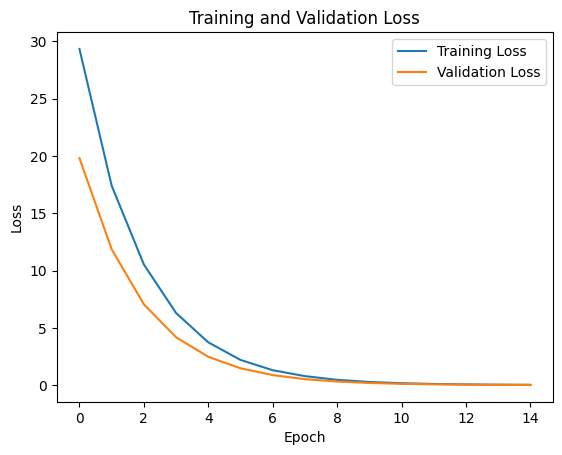

In [10]:
in_features = X_train.shape[1]
num_epochs = 15
learning_rate = 0.01

model = LinearRegression(in_features=in_features)
optimizer = SGD(model.parameters(), lr=learning_rate)
criterion = MSELoss()
trainer = Trainer(model, train_dataloader, val_dataloader, optimizer, criterion)
trainer.fit(num_epochs=num_epochs)

## Regularized Linear Regression From Scratch

Regularization is a technique to reduce overfitting. In `RegularizedLinearRegressionModel`, we add a regularization term to the loss function:

$ \text{Total Loss} = \text{MSE Loss} + \frac{\lambda}{2} \sum_{i=1}^{d} w_i^2 $

- $\lambda$ is the regularization strength.
- The regularization term penalizes large weights, encouraging simpler models.

In [11]:
n, d = 20, 200
X = torch.randn(n, d)
noise = torch.randn(n, 1) * 0.01
w, b = torch.ones((d, 1)) * 0.01, 0.05

1
y = torch.matmul(X, w) + b + noise

In [12]:
X_train, y_train, X_val, y_val = train_test_split(X, y, train_size=0.2)
train_dataloader = DataLoader(X_train, y_train, batch_size=64, shuffle=True)
val_dataloader = DataLoader(X_val, y_val, batch_size=64, shuffle=False)

We compare the performance of the regularized model with different $\lambda$ values to illustrate the effect of regularization.

In [13]:
class MSELossL2(nn.Module):
    def __init__(self, model, lambda_l2=0.01):
        super(MSELossL2, self).__init__()
        self.model = model
        self.lambda_l2 = lambda_l2

    def forward(self, y_pred, y_true):
        mse_loss = torch.mean((y_pred - y_true) ** 2)
        reg_loss = self.lambda_l2 * model.w.norm() ** 2 / 2
        total_loss = mse_loss + reg_loss
        return total_loss

Epoch 1/15, Training Loss: 162.0096, Validation Loss: 228.0050
Epoch 2/15, Training Loss: 0.6530, Validation Loss: 226.2005
Epoch 3/15, Training Loss: 0.0247, Validation Loss: 226.2908
Epoch 4/15, Training Loss: 0.0020, Validation Loss: 226.2752
Epoch 5/15, Training Loss: 0.0002, Validation Loss: 226.2787
Epoch 6/15, Training Loss: 0.0000, Validation Loss: 226.2778
Epoch 7/15, Training Loss: 0.0000, Validation Loss: 226.2780
Epoch 8/15, Training Loss: 0.0000, Validation Loss: 226.2780
Epoch 9/15, Training Loss: 0.0000, Validation Loss: 226.2780
Epoch 10/15, Training Loss: 0.0000, Validation Loss: 226.2780
Epoch 11/15, Training Loss: 0.0000, Validation Loss: 226.2780
Epoch 12/15, Training Loss: 0.0000, Validation Loss: 226.2780
Epoch 13/15, Training Loss: 0.0000, Validation Loss: 226.2780
Epoch 14/15, Training Loss: 0.0000, Validation Loss: 226.2780
Epoch 15/15, Training Loss: 0.0000, Validation Loss: 226.2780


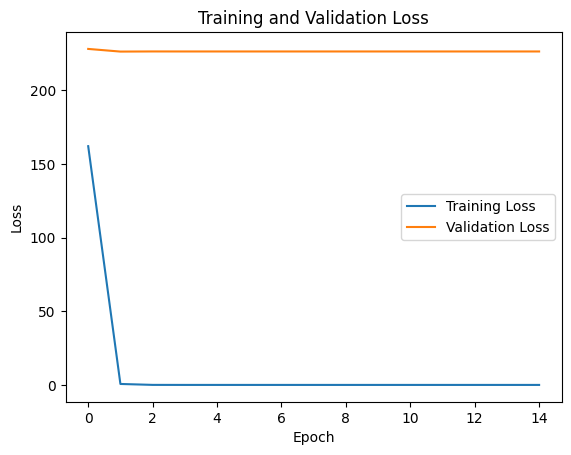

In [14]:
in_features = X_train.shape[1]
num_epochs = 15
learning_rate = 0.01
lambda_l2 = 0

model = LinearRegression(in_features=in_features)
optimizer = SGD(model.parameters(), lr=learning_rate)
criterion = MSELossL2(model, lambda_l2=lambda_l2)
trainer = Trainer(model, train_dataloader, val_dataloader, optimizer, criterion)
trainer.fit(num_epochs=num_epochs)

Epoch 1/15, Training Loss: 476.6688, Validation Loss: 612.3364
Epoch 2/15, Training Loss: 401.7390, Validation Loss: 552.2078
Epoch 3/15, Training Loss: 362.4025, Validation Loss: 498.4477
Epoch 4/15, Training Loss: 327.0539, Validation Loss: 449.7793
Epoch 5/15, Training Loss: 295.1646, Validation Loss: 405.9055
Epoch 6/15, Training Loss: 266.3862, Validation Loss: 366.2958
Epoch 7/15, Training Loss: 240.4137, Validation Loss: 330.5547
Epoch 8/15, Training Loss: 216.9735, Validation Loss: 298.2984
Epoch 9/15, Training Loss: 195.8189, Validation Loss: 269.1890
Epoch 10/15, Training Loss: 176.7268, Validation Loss: 242.9189
Epoch 11/15, Training Loss: 159.4961, Validation Loss: 219.2116
Epoch 12/15, Training Loss: 143.9454, Validation Loss: 197.8170
Epoch 13/15, Training Loss: 129.9110, Validation Loss: 178.5096
Epoch 14/15, Training Loss: 117.2449, Validation Loss: 161.0858
Epoch 15/15, Training Loss: 105.8137, Validation Loss: 145.3620


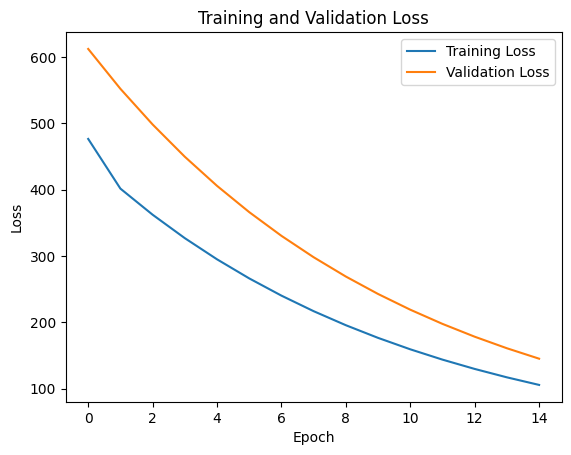

In [15]:
in_features = X_train.shape[1]
num_epochs = 15
learning_rate = 0.01
lambda_l2 = 5

model = LinearRegression(in_features=in_features)
optimizer = SGD(model.parameters(), lr=learning_rate)
criterion = MSELossL2(model, lambda_l2=lambda_l2)
trainer = Trainer(model, train_dataloader, val_dataloader, optimizer, criterion)
trainer.fit(num_epochs=num_epochs)

## Concise Implementation of Linear Regression with SGD

For a more concise implementation, we leverage PyTorch's built-in modules:

- **`nn.Linear`**: Defines a linear layer with weights and biases.
- **`optim.SGD`**: Stochastic Gradient Descent optimizer.
- **`nn.MSELoss`**: Mean Squared Error loss function.

These functions abstract away much of the manual work, allowing for a more streamlined and error-free implementation.

In [16]:
from torch.utils.data import TensorDataset, DataLoader, random_split

In [17]:
n = 1000
w = torch.tensor([2, -3.4]).reshape((-1, 1))
b = 4

X = torch.randn(n, len(w))
noise = torch.normal(mean=0, std=0.01, size=(n, 1))
y = X @ w + b + noise

Epoch 1/10, Training Loss: 29.4940, Validation Loss: 22.2495
Epoch 2/10, Training Loss: 18.3974, Validation Loss: 13.7785
Epoch 3/10, Training Loss: 11.4224, Validation Loss: 8.5184
Epoch 4/10, Training Loss: 7.0228, Validation Loss: 5.2836
Epoch 5/10, Training Loss: 4.3457, Validation Loss: 3.2824
Epoch 6/10, Training Loss: 2.7108, Validation Loss: 2.0341
Epoch 7/10, Training Loss: 1.6852, Validation Loss: 1.2586
Epoch 8/10, Training Loss: 1.0346, Validation Loss: 0.7822
Epoch 9/10, Training Loss: 0.6443, Validation Loss: 0.4857
Epoch 10/10, Training Loss: 0.3983, Validation Loss: 0.3023


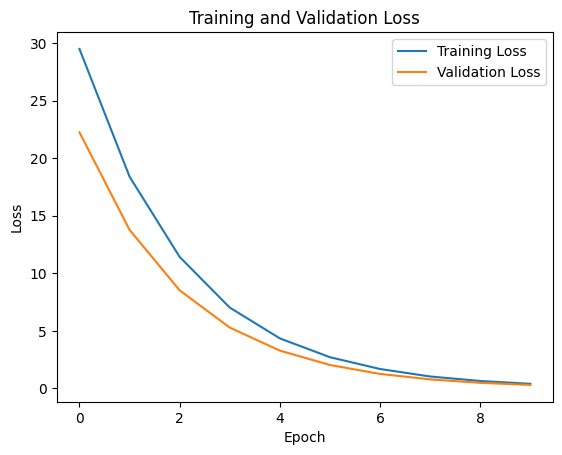

In [18]:
# Assuming X and y are your feature and target tensors
# Split Data into Train and Test Sets
dataset = TensorDataset(X, y)
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

# Define DataLoader
batch_size = 64
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# Define the Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self, input_size):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(input_size, 1)

    def forward(self, x):
        return self.linear(x)


model = LinearRegression(X.shape[1])

# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)
trainer = Trainer(model, train_dataloader, val_dataloader, optimizer, criterion)
trainer.fit(num_epochs=10)

In [19]:
model.linear.weight

Parameter containing:
tensor([[ 1.8186, -3.0330]], requires_grad=True)